# Hacker Earth Machine Learning Challenge 1
## Problem Statement
* The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
* After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
* This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.
* In this challenge, you will help this bank by predicting the probability that a member will default.

## Author
Abhijit Annaldas

## Solution Approach
* Read data, include relevant columns
* Transform data (data cleansing)
* Missing value imputation
* Categorize/Dummify
* Move target variable to different dataframe
* Split - train and cross validation sets
* Predict

In [1]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Importing packages...


In [2]:
print('Reading data...')
dfTrain = pd.read_csv('train_indessa.csv')
dfTest = pd.read_csv('test_indessa.csv')
# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
dfTrain = dfTrain[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dfTest = dfTest[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

Reading data...


In [3]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')

print('Transform: emp_length...')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [4]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [5]:
# Columns home_ownership and purpose columns attributes were earlier included and were considered categorical
# But since the feature importance was low, they were removed. Keeping this section here for sake of completeness
# of data preprocessing steps for reference, to dummify/categorize variables, update list of attributes cat_attr

#cat_attr = ['home_ownership', 'purpose']
#for cat in cat_attr:
#    print('Categorizing: %s...' % (cat))
#    df_col = [cat]
#    dfTrain[cat] = dfTrain[cat].astype("category")
#    dfTrain[cat] = pd.get_dummies(dfTrain, columns=df_col)
#    dfTest[cat] = dfTest[cat].astype("category")
#    dfTest[cat] = pd.get_dummies(dfTest, columns=df_col)

In [19]:
'''
Feature Engineering
'''

# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dfTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/(finalTrain['funded_amnt_inv'] + 1)
finalTest['loan_to_income'] = finalTest['annual_inc']/(finalTest['funded_amnt_inv'] + 1)


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)



C:\Users\aruna\AppData\Local\Temp\ipykernel_23368\3938744777.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTrain['loan_to_income'] = finalTrain['annual_inc']/(finalTrain['funded_amnt_inv'] + 1)
C:\Users\aruna\AppData\Local\Temp\ipykernel_23368\3938744777.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTest['loan_to_income'] = finalTest['annual_inc']/(finalTest['funded_amnt_inv'] + 1)
C:\Users\aruna\AppData\Local\Temp\ipykernel_23368\3938744777.py:28: SettingWithCopyWarning: 
A value is

In [25]:
finalTrain = finalTrain.drop('member_id', axis=1)
finalTest = finalTest.drop('member_id', axis=1)

In [26]:
'''
Split data set into train-test-cv
Train model & predict
'''
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [27]:
finalTrain.describe()

,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,...,recoveries,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,5.324280e+05,532428.000000,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532289.000000,532428.000000,532428.000000,532428.000000
mean,6.010026,14757.595722,14744.271291,14704.926696,20.940448,13.242969,7.502979e+04,18.138767,32.491481,70.014355,...,45.717832,4.859221,43.195790,0.005015,0.014297,25.553662,0.055964,13.721741,1753.823741,32.643709
std,3.571685,8434.420080,8429.139277,8441.290381,12.974251,4.379611,6.519967e+04,8.369074,15.365599,11.051310,...,409.647467,63.123361,10.996354,0.079116,0.132993,1234.062064,0.229852,9.001428,2093.570564,25.932345
min,0.000000,500.000000,500.000000,0.000000,1.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,36.000000,0.000000,0.000000,0.099992,0.000000,-6.000000,0.000000,0.000000
25%,3.000000,8000.000000,8000.000000,8000.000000,12.000000,9.990000,4.500000e+04,11.930000,31.000000,70.000000,...,0.000000,0.000000,36.000000,0.000000,0.000000,3.333148,0.000000,7.000000,441.840000,11.877395
50%,6.000000,13000.000000,13000.000000,13000.000000,21.000000,12.990000,6.500000e+04,17.650000,31.000000,70.000000,...,0.000000,0.000000,36.000000,0.000000,0.000000,4.799808,0.000000,12.000000,1072.940000,24.840764
75%,10.000000,20000.000000,20000.000000,20000.000000,31.000000,16.200000,9.000000e+04,23.950000,31.000000,70.000000,...,0.000000,0.000000,60.000000,0.000000,0.000000,7.499375,0.000000,19.000000,2235.500000,47.133758
max,10.000000,35000.000000,35000.000000,35000.000000,65.000000,28.990000,9.500000e+06,672.520000,180.000000,121.000000,...,33520.270000,7002.190000,60.000000,14.000000,16.000000,284313.682451,1.000000,148.000000,24205.620000,193.630573


Initializing xgboost.sklearn.XGBClassifier and starting training...


C:\Users\aruna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\aruna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89155
[1]	validation_0-auc:0.90148
[2]	validation_0-auc:0.90537
[3]	validation_0-auc:0.90585
[4]	validation_0-auc:0.91318
[5]	validation_0-auc:0.91475
[6]	validation_0-auc:0.91599
[7]	validation_0-auc:0.91738
[8]	validation_0-auc:0.91882
[9]	validation_0-auc:0.91933
[10]	validation_0-auc:0.92037
[11]	validation_0-auc:0.92062
[12]	validation_0-auc:0.92119
[13]	validation_0-auc:0.92214
[14]	validation_0-auc:0.92281
[15]	validation_0-auc:0.92331
[16]	validation_0-auc:0.92379
[17]	validation_0-auc:0.92399
[18]	validation_0-auc:0.92420
[19]	validation_0-auc:0.92442
[20]	validation_0-auc:0.92460
[21]	validation_0-auc:0.92490
[22]	validation_0-auc:0.92542
[23]	validation_0-auc:0.92571
[24]	validation_0-auc:0.92628
[25]	validation_0-auc:0.92653
[26]	validation_0-auc:0.92687
[27]	validation_0-auc:0.92695
[28]	validation_0-auc:0.92710
[29]	validation_0-auc:0.92724
[30]	validation_0-auc:0.92732
[31]	validation_0-auc:0.92758
[32]	validation_0-auc:0.92778
[33]	validation_0-au

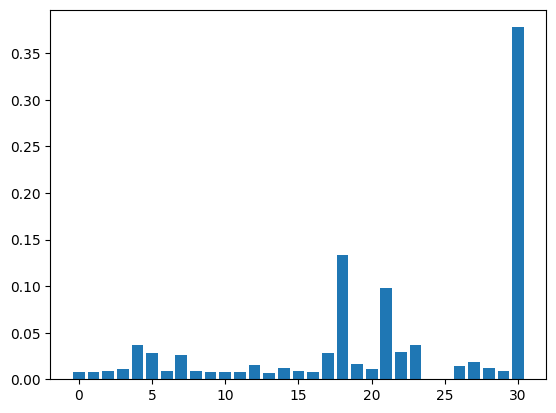

In [28]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_member_id, final_pred.loc[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
